<a href="https://colab.research.google.com/github/swguo/Plant-Classification/blob/main/%5BPlant%5D_Pl_ntNet_API_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

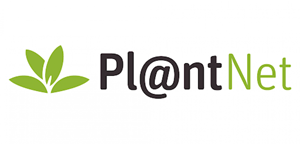

官方網站 : https://my.plantnet.org/

GitHub : https://github.com/plantnet/my.plantnet

提供的服務:

1. 植物類型分類
2. 植物物種分類

特色:
1. 支援多國語系


限制:
1. 每日限流 500
2. 一次只能辨識一種植物(多張圖)

In [7]:
import requests
import json
from pprint import pprint
from PIL import Image
from io import BytesIO

## API Setting

In [2]:
API_KEY = "2b10bwXAVonATTlNTwIaHBWgu"  # Set you API_KEY here
PROJECT = "all" # try "weurope" or "canada"
lang = "zh-tw"
api_endpoint = f"https://my-api.plantnet.org/v2/identify/{PROJECT}?api-key={API_KEY}"

## 圖源:黃金葛
### 學名 : Epipremnum aureum

In [3]:
def get_image(image_urls):
    images_raw = []
    for im_url in image_urls:
        response = requests.get(im_url, stream=True).content
        images_raw.append(response)
    return images_raw

In [4]:
## 示範:採用多視角圖，辨識同一個植物(提高準確度)
image_urls = ["https://shoplineimg.com/6090f47c3a9bf8003150f14f/61194d921a6eb60020e4cdfe/800x.jpg",
         "https://foliageandme.com/wp-content/uploads/Pothos-Icon.jpg",
         "https://pic.baike.soso.com/ugc/baikepic2/1844/cut-20200618191932-474729695_jpg_544_363_39884.jpg/1284"]

images_raw = get_image(image_urls = image_urls)


data = {
    'organs': ['auto']*len(images_raw) # must contains one of: leaf, flower, fruit, bark, auto.
}

files = []
for idx,raw_data in enumerate(images_raw):
    files.append(('images', ('', raw_data)))

print(f'Number of images: {len(images_raw)}')

Number of images: 3


### 預覽目標圖片

In [5]:
def plot_image(image):
  size = 128, 128
  im = Image.open(image)
  im.thumbnail(size, Image.Resampling.LANCZOS)
  display(im)

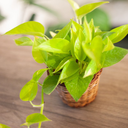

In [8]:
image = BytesIO(images_raw[0])
plot_image(image)

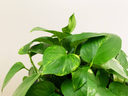

In [9]:
image = BytesIO(images_raw[1])
plot_image(image)

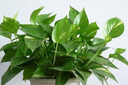

In [10]:
image = BytesIO(images_raw[2])
plot_image(image)

## 取得辨識結果

In [11]:
req = requests.Request('POST', url=api_endpoint, files=files, data=data)
prepared = req.prepare()
s = requests.Session()
response = s.send(prepared)

json_result = json.loads(response.text)

pprint(response.status_code)

200


In [12]:
pprint(json_result)

{'bestMatch': 'Epipremnum aureum (Linden & André) G.S.Bunting',
 'language': 'en',
 'preferedReferential': 'k-world-flora',
 'query': {'images': ['ecd33eeadef78ae97a76065dfac96024',
                      '4759d6f04985d999c95ae83bbdd9f705',
                      'de753e850f9849c90e0951ef7532a4f3'],
           'includeRelatedImages': False,
           'noReject': False,
           'organs': ['auto', 'auto', 'auto'],
           'project': 'all'},
 'remainingIdentificationRequests': 495,
 'results': [{'gbif': {'id': '2868323'},
              'powo': {'id': '87014-1'},
              'score': 0.73537,
              'species': {'commonNames': ['Golden pothos',
                                          'Money plant',
                                          'پیتوس ابلق'],
                          'family': {'scientificName': 'Araceae',
                                     'scientificNameAuthorship': '',
                                     'scientificNameWithoutAuthor': 'Araceae'},
         

## 結果

In [13]:
print(json_result['bestMatch'])
print(json_result['results'][0]['score'])

Epipremnum aureum (Linden & André) G.S.Bunting
0.73537


## 圖源:虎尾蘭
### 學名 : Dracaena trifasciata

In [14]:
## 示範:採用多視角圖，辨識同一個植物(提高準確度)
image_urls = ['https://www.picturethisai.com/wiki-image/1080/153936867790684172.jpeg']

images_raw = get_image(image_urls = image_urls)


data = {
    'organs': ['auto']*len(images_raw) # must contains one of: leaf, flower, fruit, bark, auto.
}

files = []
for idx,raw_data in enumerate(images_raw):
    files.append(('images', ('', raw_data)))

print(f'Number of images: {len(images_raw)}')

Number of images: 1


### 預覽目標圖片

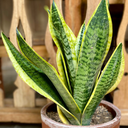

In [15]:
image = BytesIO(images_raw[0])
plot_image(image)

## 取得識別結果

In [16]:
req = requests.Request('POST', url=api_endpoint, files=files, data=data)
prepared = req.prepare()
s = requests.Session()
response = s.send(prepared)

json_result = json.loads(response.text)

pprint(response.status_code)

200


In [17]:
pprint(json_result)

{'bestMatch': 'Dracaena stuckyi (God.-Leb.) Byng & Christenh.',
 'language': 'en',
 'preferedReferential': 'k-world-flora',
 'query': {'images': ['735907c56aab727e3d4ec07c3708607f'],
           'includeRelatedImages': False,
           'noReject': False,
           'organs': ['auto'],
           'project': 'all'},
 'remainingIdentificationRequests': 494,
 'results': [{'gbif': {'id': '11064950'},
              'powo': {'id': '77183329-1'},
              'score': 0.34264,
              'species': {'commonNames': ['Snake plant',
                                          "Mother-in-Law's Tongue",
                                          'Stuckyi Snake Plant'],
                          'family': {'scientificName': 'Asparagaceae',
                                     'scientificNameAuthorship': '',
                                     'scientificNameWithoutAuthor': 'Asparagaceae'},
                          'genus': {'scientificName': 'Dracaena',
                                    'scient

## 結果

In [18]:
print(json_result['bestMatch'])
print(json_result['results'][0]['score'])

Dracaena stuckyi (God.-Leb.) Byng & Christenh.
0.34264


## 圖源 : 空氣鳳梨
### 學名 : Tillandsia ionantha

In [19]:
## 示範:採用多視角圖，辨識同一個植物(提高準確度)
image_urls = ['https://shoplineimg.com/6295e0f2d7d1ac0032a2a3fc/62bfb0670cadeb001e686931/800x.jpg']

images_raw = get_image(image_urls = image_urls)


data = {
    'organs': ['auto']*len(images_raw) # must contains one of: leaf, flower, fruit, bark, auto.
}

files = []
for idx,raw_data in enumerate(images_raw):
    files.append(('images', ('', raw_data)))

print(f'Number of images: {len(images_raw)}')

Number of images: 1


## 預覽目標圖片

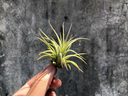

In [20]:
image = BytesIO(images_raw[0])
plot_image(image)

## 取得識別結果

In [21]:
req = requests.Request('POST', url=api_endpoint, files=files, data=data)
prepared = req.prepare()
s = requests.Session()
response = s.send(prepared)

json_result = json.loads(response.text)

pprint(response.status_code)

200


In [22]:
pprint(json_result)

{'bestMatch': 'Tillandsia ionantha Planch.',
 'language': 'en',
 'preferedReferential': 'k-world-flora',
 'query': {'images': ['7aab6cf2d0791eaa57b20ef41fd76af4'],
           'includeRelatedImages': False,
           'noReject': False,
           'organs': ['auto'],
           'project': 'all'},
 'remainingIdentificationRequests': 493,
 'results': [{'gbif': {'id': '2695006'},
              'iucn': {'category': 'LC', 'id': '44393060'},
              'powo': {'id': '125266-1'},
              'score': 0.84012,
              'species': {'commonNames': ['Air plant',
                                          'Sky plant',
                                          'Blushing Bride'],
                          'family': {'scientificName': 'Bromeliaceae',
                                     'scientificNameAuthorship': '',
                                     'scientificNameWithoutAuthor': 'Bromeliaceae'},
                          'genus': {'scientificName': 'Tillandsia',
                       

## 結果

In [23]:
print(json_result['bestMatch'])
print(json_result['results'][0]['score'])

Tillandsia ionantha Planch.
0.84012
